In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import GridSearchCV

In [24]:
# Load data
df = pd.read_csv("/Users/mariahloehr/IICD/IICD/Data/cell_cycle_tidied.csv")

#df['phase'] = df['phase'].replace({'M': 'G2'})

# Separate features and target
X = df.drop(columns=['phase', 'age', 'PHATE_1', 'PHATE_2'])  # exclude phase and age
y = df['age']  # target is now age

feature_names = X.columns.tolist()
X = X.to_numpy()
y = y.to_numpy()

In [25]:
# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=949)

In [ ]:
#retrain 
rf = RandomForestRegressor(
    n_estimators=600, 
    max_depth=50, 
    max_features=150, 
    random_state=949,
    n_jobs = -1)
rf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

<Axes: title={'center': 'Random Forest MDI (Top 20)'}>

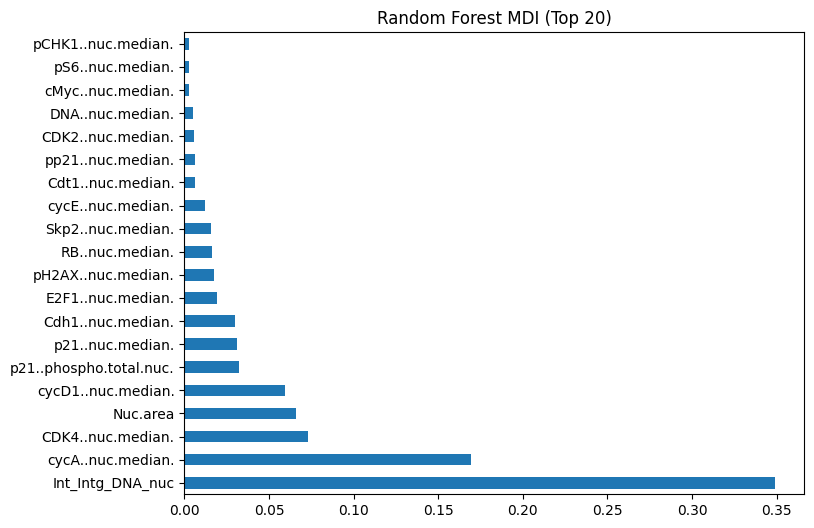

In [5]:
# Extract MDI importances
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_importances_sorted = rf_importances.sort_values(ascending=False)

# Top features
rf_importances_sorted.head(20).plot(kind='barh', figsize=(8, 6), title='Random Forest MDI (Top 20)')

LOCO

In [9]:
import sys
sys.path.append("/Users/mariahloehr/IICD/IICD/feature_importance")

In [33]:
import locomp
from locomp import *
from locomp.MLmodels import *
import itertools
import importlib
from sklearn.base import BaseEstimator, RegressorMixin, clone
import itertools
from functools import partial
import multiprocessing as mp
import re

In [43]:
def RFreg(X,Y,X1):
    rf = RandomForestRegressor(n_estimators=600, 
                               max_depth=50, 
                               max_features=150,
                               bootstrap=False,
                               n_jobs = -1).fit(X,Y)
    return rf.predict(X1)

In [41]:
J1 = 0
J2 = 1
m_ratio = 0.2
n_ratio = 0.2
B = 5000
fit_func = RFreg

In [ ]:
x=LOCOMPReg(X_train,y_train,n_ratio,m_ratio,B,fit_func, selected_features=[],alpha=0.1,bonf=False)
x.run_loco()
#x.loco_ci